{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 150, 'height': 149, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0002694945852358564, 0.0, 145.62828198949978,
       0.0, -0.0002694945852358564, -22.249069535924015), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
1
149 150
EPSG:4326
(1, 149, 150)
int16


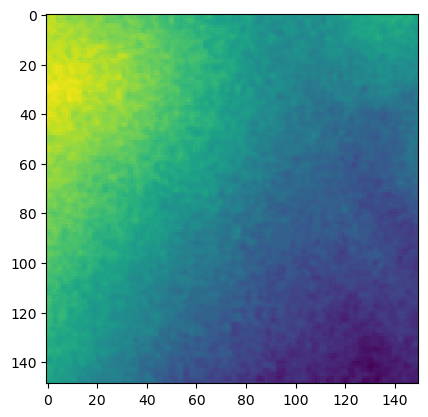

In [4]:
import rasterio as rs
import numpy as np
from matplotlib import pyplot as plt

geotiff_dir = "./download2/"
geotiff_file = "elev_0_-22.269158650668658_145.64846199698434_20230813_134144.tif"
png_output_dir = "./png_output/"
png_output = "test.png"

dataset = rs.open(geotiff_dir + geotiff_file)
data = dataset.read()

print(dataset.profile)
# No. of bands
print (dataset.count)
# Image resolution
print (dataset.height, dataset.width)
# CRS
print (dataset.crs)
print(data.shape)
print(data.dtype)

crs = dataset.crs
transform = dataset.transform

plt.imshow(data[0], interpolation='nearest')
plt.show()


# with rs.open(png_output_dir + png_output, 'w', driver='PNG',
#                width=data.shape[1], height=data.shape[2],
#                count=1, dtype=data.dtype, nodata=None,
#                transform=transform, crs=crs, format='PNG') as dst:
#     dst.write(data, indexes=None)

In [5]:
import rasterio as rs
from os import listdir
from os.path import isfile, join
output_format = 'GIF'

geotiff_dir = "./download2/"
png_output_dir = "./png_output2/"
contents = listdir(geotiff_dir)

crs = dataset.crs
transform = dataset.transform

print("dirs:", contents)

for file in contents:
    filepath = join(geotiff_dir, file)
    print("filepath: ", filepath)
    if isfile(filepath):
        print("it's a file!")

        dataset = rs.open(filepath)
        data = dataset.read()
        png_filename = file.replace(".tif", ".gif")
        png_filepath = join(png_output_dir, png_filename)

        print("dataset read")

        with rs.open(png_filepath, 'w', driver=output_format,
                    width=data.shape[1], height=data.shape[2],
                    count=1, dtype=data.dtype, nodata=None,
                    transform=transform, crs=crs, format=output_format) as dst:
            dst.write(data, indexes=None)

        print("written: ", png_filename)

dirs: ['elev_358_-26.813836902552584_137.32474882581084_20230813_134144.tif', 'elev_211_-29.64940110861792_137.6070663523978_20230813_134144.tif', 'elev_36_-22.852141722257954_137.94707126668223_20230813_134144.tif', 'elev_346_-24.992893294751582_141.00030755394968_20230813_134144.tif', 'elev_151_-18.0883524200729_131.73114397660942_20230813_134144.tif', 'elev_360_-20.633492918288628_141.43836716216995_20230813_134144.tif', 'elev_437_-22.5568980498662_142.7587537537833_20230813_134144.tif', 'elev_102_-27.5784267369456_140.04168419451085_20230813_134144.tif', 'elev_493_-29.281956628368796_143.74285295411283_20230813_134144.tif', 'elev_45_-19.701348992870575_140.56307608044548_20230813_134144.tif', 'elev_288_-21.00685732266897_130.27521970464576_20230813_134144.tif', 'elev_155_-27.994155491880395_141.9312576886894_20230813_134144.tif', 'elev_260_-18.82803353897953_143.42987792361123_20230813_134144.tif', 'elev_270_-21.605749774579273_125.89688635804204_20230813_134144.tif', 'elev_482_-20

CPLE_NotSupportedError: PNG driver doesn't support data type Int16. Only eight bit (Byte) and sixteen bit (UInt16) bands supported.  

In [2]:
data[0,0,0]

857